<a href="https://colab.research.google.com/github/fkonrad97/Network/blob/main/Shortest_Paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
from collections import defaultdict
from math import log, e
import csv
import pandas as pd
import numpy as np
from typing import List
from sys import maxsize
from collections import deque
import random
import matplotlib.pyplot as plt

In [217]:
# Print out the 'list' to the 'name.csv' file 

def printOut(name, list):
    with open(name + '.csv', 'w', newline='') as csv_1:
        csv_out = csv.writer(csv_1)
        csv_out.writerows([list[index]] for index in range(0, len(list)))

In [218]:
# Read positions of nodes (X,Y,Z)

def positionRead(name):
    positions = pd.read_csv(name + ".csv", header=None, sep=";")
    # Remove a plus sign from the end of the number
    positions[0][0] = positions[0][0][:-1]
    positions[0] = positions[0].astype(float)    # Convert data to numerical value
    return positions

In [219]:
# Read connection table between nodes

def connectionRead(name):
    connections = pd.read_csv(name + ".csv", header=None)
    return connections

In [220]:
# List of the positions of nodes
# positions = positionRead("Network/Brain_data/Brain1Positions")
positions = positionRead("/content/Brain1Positions")

# List of how nodes connected to each other
# connections = connectionRead("Network/Brain_data/Brain1Connections")
connections = connectionRead("/content/Brain1Connections")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
# Entropy by numpy library

def entropy(labels, base=None):
    n_labels = len(labels)
    
    if n_labels <= 1:
        return 0
    
    value, counts = np.unique(labels, return_counts=True)
    probs = counts/n_labels
    n_classes = np.count_nonzero(probs)
    
    if n_classes <= 1:
        return 0
    
    ent = 0.
    
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)
        
    return ent

In [222]:
paths = []

for i in range(len(connections)):
  src = i
  dest = 0
  route = []
  for j in connections[i]:
    if j == 1 and src < dest:
      route.append([src,dest])
    dest += 1
  paths.append(route)

In [223]:
# Function to form edge between
# two vertices src and dest
 
def add_edge(adj: List[List[int]],
             src: int, dest: int) -> None:
    adj[src].append(dest)
    adj[dest].append(src)

# Function which finds all the paths
# and stores it in paths array
def find_paths(paths: List[List[int]], path: List[int],
               parent: List[List[int]], n: int, u: int) -> None:
    # Base Case
    if (u == -1):
        paths.append(path.copy())
        return
 
    # Loop for all the parents
    # of the given vertex
    for par in parent[u]:
 
        # Insert the current
        # vertex in path
        path.append(u)
 
        # Recursive call for its parent
        find_paths(paths, path, parent, n, par)
 
        # Remove the current vertex
        path.pop()

# Function which performs bfs
# from the given souce vertex
def bfs(adj: List[List[int]],
        parent: List[List[int]], n: int,
        start: int) -> None:
 
    # dist will contain shortest distance
    # from start to every other vertex
    dist = [maxsize for _ in range(n)]
    q = deque()
 
    # Insert source vertex in queue and make
    # its parent -1 and distance 0
    q.append(start)
    parent[start] = [-1]
    dist[start] = 0
 
    # Untill Queue is empty
    while q:
        u = q[0]
        q.popleft()
        for v in adj[u]:
            if (dist[v] > dist[u] + 1):
 
                # A shorter distance is found
                # So erase all the previous parents
                # and insert new parent u in parent[v]
                dist[v] = dist[u] + 1
                q.append(v)
                parent[v].clear()
                parent[v].append(u)
 
            elif (dist[v] == dist[u] + 1):
 
                # Another candidate parent for
                # shortes path found
                parent[v].append(u)
 
# Function which prints all the paths
# from start to end
def getPaths(adj: List[List[int]], n: int,
                start: int, end: int) -> None:
    revPaths = []
    path = []
    parent = [[] for _ in range(n)]

    paths = []
 
    # Function call to bfs
    bfs(adj, parent, n, start)
 
    # Function call to find_paths
    find_paths(revPaths, path, parent, n, end)
    for v in revPaths:
        v = v[::-1]
        paths.append(v)

    return paths

In [224]:
# Number of vertices
n = 83

# Number of pairs
pairs = 0
for i in paths:
  for j in i:
    pairs+=1

# array of vectors is used
# to store the graph
# in the form of an adjacency list
adj = [[] for i in range(len(paths))]

for i in paths:
  for j in i:
    add_edge(adj, j[0], j[1])

In [225]:
shortest_paths = []

for i in range(len(paths)):
  for j in range(len(paths)):
    if i!=j:
      shortest_paths.append(getPaths(adj, n, i, j))

In [226]:
routingTable = []

for j in range(100):
  routes = []
  for i in shortest_paths:
    routes.append(random.choice(i))
  routingTable.append(routes)

In [227]:
entropyTables = []

for i in routingTable:
  temp = []
  for j in i:
    temp.append(entropy(j))
  entropyTables.append(temp)

In [377]:
epochSize = len(connections[0])-1 # saját magukhoz nem vezet út
# ent[0] - entropy of paths from 0 -> [1:82]
ent = []

for i in entropyTables:
  temp = []
  table = []
  for j in range(len(i)):
    temp.append(i[j])
    if len(temp)==epochSize:
      table.append(temp)
      temp = []
  ent.append(table)

In [385]:
# Entrópiája a 100x82 routing táblának külön-külön
# avgEntropy[0] - len = 82 -> minden táblának az átlagos entrópiája

avgEntropy = []

for i in ent:
  avgIter = []
  for j in i:
    sum = 0
    for z in j:
      sum += z
    mean = sum/len(j)
    avgIter.append(mean)
  avgEntropy.append(avgIter)

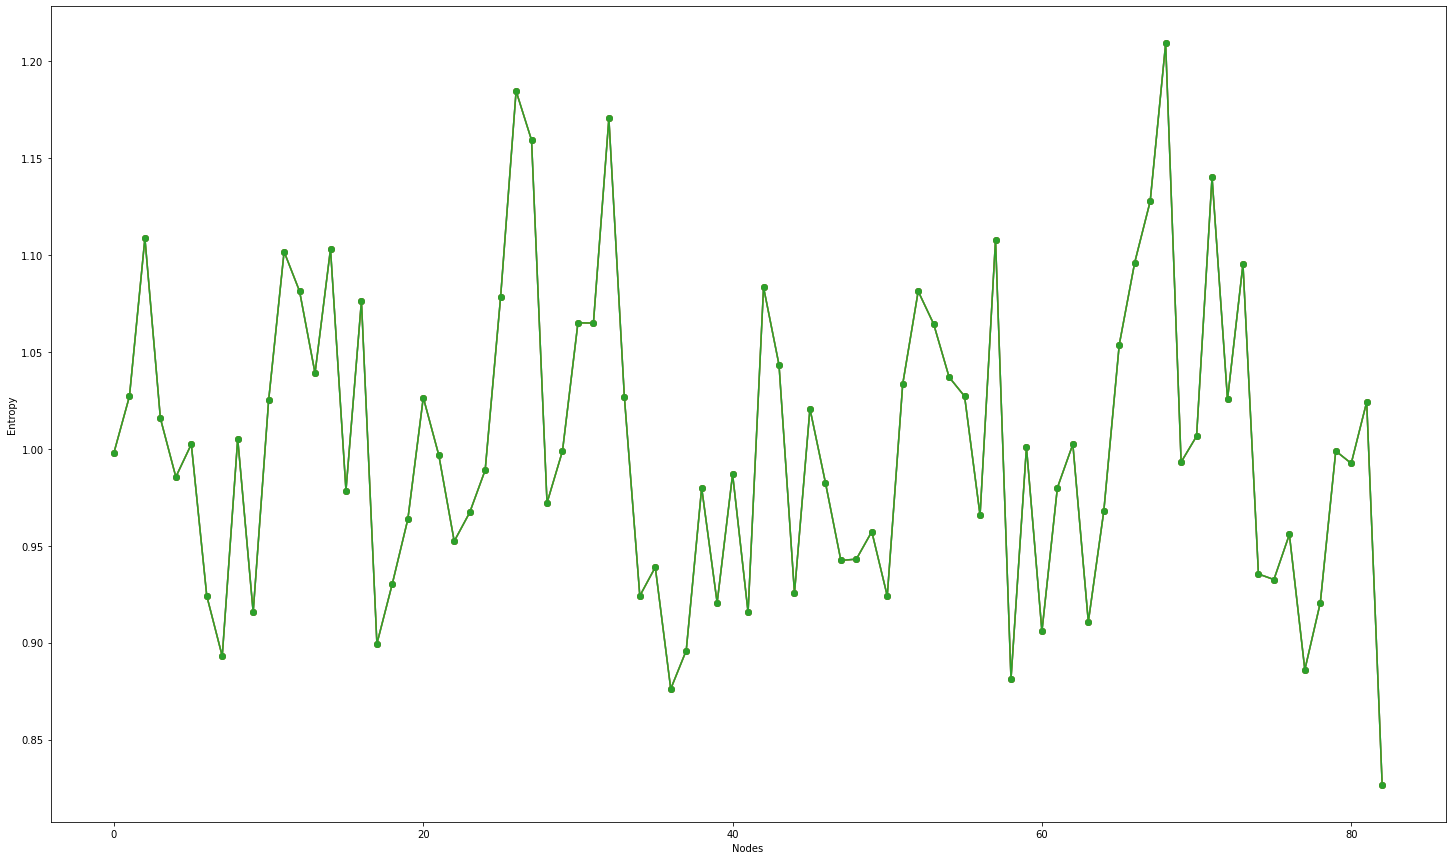

In [402]:
x_axes = [*range(0, len(positions[0]), 1)]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)

# naming the x axis
plt.xlabel('Nodes')
# naming the y axis
plt.ylabel('Entropy')

# Blue
plt.plot(x_axes, avgEntropy[99], marker='o')
# Green
plt.plot(x_axes, avgEntropy[50], marker='o')
# Orange
plt.plot(x_axes, avgEntropy[0], marker='o')

plt.show()